In [1]:
import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting
import matplotlib.pyplot as plt


In [2]:
# load historical data
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-07-01', end='2025-07-31')['Close']

/tmp/ipykernel_1261811/1763413805.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2015-07-01', end='2025-07-31')['Close']
[*********************100%***********************]  3 of 3 completed


In [3]:
# Calculate daily returns
returns = data.pct_change().dropna()

In [4]:
# Estimate expected returns
# Use forecasted return for TSLA 
forecasted_tsla_return = 0.012 
historical_returns = expected_returns.mean_historical_return(data)

In [5]:
# Override TSLA return with forecast
historical_returns['TSLA'] = forecasted_tsla_return

# Calculate covariance matrix
cov_matrix = risk_models.sample_cov(data)

In [6]:
# Optimize portfolio
ef = EfficientFrontier(historical_returns, cov_matrix)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
performance = ef.portfolio_performance(verbose=True)

Expected annual return: 7.3%
Annual volatility: 9.3%
Sharpe Ratio: 0.79


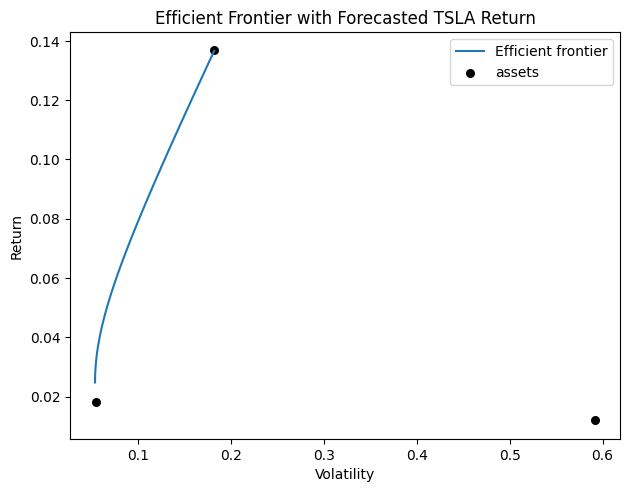

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot Efficient Frontier
ef_plot = EfficientFrontier(historical_returns, cov_matrix)
plotting.plot_efficient_frontier(ef_plot, show_assets=True)
plt.title("Efficient Frontier with Forecasted TSLA Return")
plt.show()
plt.savefig('../plots/efficient_frontier.png')

In [8]:
# Display results
print("Optimal Weights:")
for asset, weight in cleaned_weights.items():
    print(f"{asset}: {weight:.2%}")

print(f"\nExpected Annual Return: {performance[0]:.2%}")
print(f"Annual Volatility: {performance[1]:.2%}")
print(f"Sharpe Ratio: {performance[2]:.2f}")

Optimal Weights:
BND: 53.49%
SPY: 46.51%
TSLA: 0.00%

Expected Annual Return: 7.33%
Annual Volatility: 9.29%
Sharpe Ratio: 0.79
